# Classification Approch

#  رویکرد KNN رویکردی مناسب تری بود
## Lineaer


              precision    recall  f1-score   support

           N       0.86      0.96      0.91        26
           O       0.00      0.00      0.00         4

    accuracy                           0.83        30
   macro avg       0.43      0.48      0.45        30
weighted avg       0.75      0.83      0.79        30

## Polynimal

In [1]:


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
ConfusionMatrixDisplay,PrecisionRecallDisplay,RocCurveDisplay)


## Work flow
0. [X] Clean and Engeering Data for X and y
1. [X] Split Data in Train/Test for X and y
2. [X] Scaler on Training X & X test
3. [x] Create Model(s)
4. [x] Fit/Train Model(s) on X Train
5. [ ] Evaluate Model(s) on X test
6. [ ] Adjust Param as Necessary
7. [ ] Bonus: Save Model(s)

### PreProcess


In [2]:
cols = ['Season','Age','Childish diseases','Trauma','Surgical','High fever','Alcohol consumption','Smoking','Sitting hour/day','Output']
df= pd.read_csv('../fertility_Diagnosis.txt',names=cols)
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Clean and Engeering Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Season               100 non-null    float64
 1   Age                  100 non-null    float64
 2   Childish diseases    100 non-null    int64  
 3   Trauma               100 non-null    int64  
 4   Surgical             100 non-null    int64  
 5   High fever           100 non-null    int64  
 6   Alcohol consumption  100 non-null    float64
 7   Smoking              100 non-null    int64  
 8   Sitting hour/day     100 non-null    float64
 9   Output               100 non-null    object 
dtypes: float64(4), int64(5), object(1)
memory usage: 7.9+ KB


In [4]:
#df['Output']= df['Output'].map({'N':1,'O':0})

In [5]:
df

,Season,Age,Childish diseases,Trauma,Surgical,High fever,Alcohol consumption,Smoking,Sitting hour/day,Output
0,-0.33,0.69,0,1,1,0,0.8,0,0.88,N
1,-0.33,0.94,1,0,1,0,0.8,1,0.31,O
2,-0.33,0.50,1,0,0,0,1.0,-1,0.50,N
3,-0.33,0.75,0,1,1,0,1.0,-1,0.38,N
4,-0.33,0.67,1,1,0,0,0.8,-1,0.50,O
...,...,...,...,...,...,...,...,...,...,...
95,-1.00,0.67,1,0,0,0,1.0,-1,0.50,N
96,-1.00,0.61,1,0,0,0,0.8,0,0.50,N
97,-1.00,0.67,1,1,1,0,1.0,-1,0.31,N
98,-1.00,0.64,1,0,1,0,1.0,0,0.19,N


#### Split Data in Train/Test for X and y


In [6]:
X = df.drop(['Output'],axis=1)
y = df['Output']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1099,stratify=y)
y.value_counts()

Output
N    88
O    12
Name: count, dtype: int64

### Model

#### Create Model(s)

In [10]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  SVC(*, C=1.0, kernel='rbf', degree=3, gamma='scale', coef0=0.0, shrinking=True, probability=False, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=-1, decision_function_shape='ovr', break_ties=False, random_state=None)
 |  
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`~sklearn.svm.LinearSVC` or
 |  :class:`~sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`~sklearn.kernel_approximation.Nystroem` transformer or
 |  other :ref:`kernel_approximation`.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `g

In [11]:
from sklearn.pipeline import Pipeline

In [12]:
scale = StandardScaler()
svc_model = SVC()

In [13]:
svc_model.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [14]:
kernel =['linear', 'poly', 'rbf', 'sigmoid',]
degree = list(range(1,10))
gamma = ['scale', 'auto' ]
decision_function_shape = ['ovo', 'ovr']

In [22]:
pipe =Pipeline([('svc',svc_model)])


In [23]:
hyp_par = {'svc__gamma' : gamma,
'svc__decision_function_shape' :  decision_function_shape,
'svc__degree' : degree,
'svc__kernel' : kernel,
}

In [24]:
from sklearn.model_selection import GridSearchCV

In [25]:
full_model = GridSearchCV(pipe,hyp_par,cv=2,scoring='accuracy')


#### Train Model

In [26]:
full_model.fit(X_train,y_train)

GridSearchCV(cv=2, estimator=Pipeline(steps=[('svc', SVC())]),
             param_grid={'svc__decision_function_shape': ['ovo', 'ovr'],
                         'svc__degree': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'svc__gamma': ['scale', 'auto'],
                         'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

### Evaluate model

#### Test On data

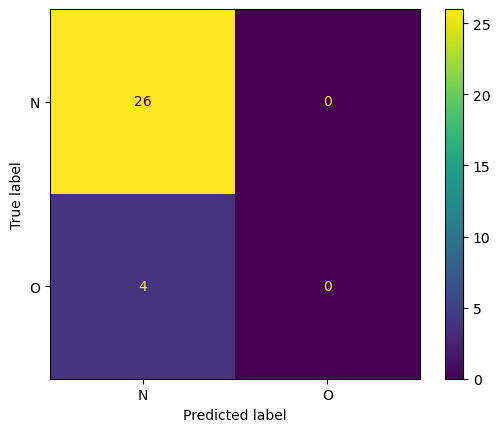

In [27]:
y_pred =full_model.predict(X_test)
ConfusionMatrixDisplay(confusion_matrix(y_true=y_test,y_pred=y_pred),display_labels=full_model.classes_).plot()

In [28]:
print(classification_report(y_true=y_test,y_pred=y_pred))

              precision    recall  f1-score   support

           N       0.87      1.00      0.93        26
           O       0.00      0.00      0.00         4

    accuracy                           0.87        30
   macro avg       0.43      0.50      0.46        30
weighted avg       0.75      0.87      0.80        30



/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [21]:
full_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=1)),
  ('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=2))],
 'verbose': False,
 'poly': PolynomialFeatures(degree=1),
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=2),
 'poly__degree': 1,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 2,
 'knn__p': 2,
 'knn__weights': 'uniform'}

### Final Model(s)


#### Train on all Data 

##### no need

#### Save with joblib

In [22]:
import joblib


In [24]:
joblib.dump(value=full_model,filename='knn.pkl')

['knn.pkl']

# Congratulations!!!

#### Created and trained by  Matin1099.
